In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [2]:
np.random.seed(0)

In [4]:
X,y=make_blobs(n_samples=50,centers=[[4,4],[1,1],[3,3],[2,1]],cluster_std=0.9)

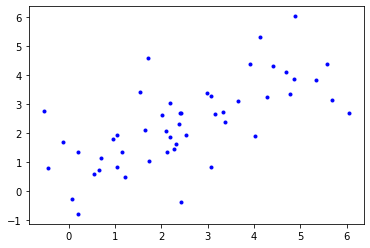

In [10]:
plt.scatter(X[:,0],X[:,1],marker=".",color="blue")

In [11]:
agglo=AgglomerativeClustering(n_clusters=4,linkage="average")

In [12]:
agglo.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=4)

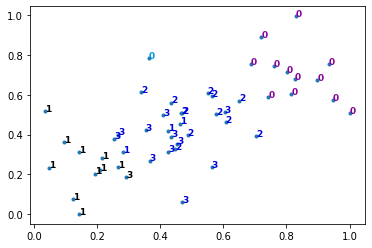

In [17]:
plt.figure(figsize=(6,4))
x1,x2=(np.min(X)),(np.max(X))
X=(X-x1)/(x2-x1)
for i in range(X.shape[0]):
    plt.text(X[i,0],X[i,1],str(y[i]),color=plt.cm.nipy_spectral(agglo.labels_[i]/10), fontdict={'weight': 'bold', 'size': 9})
plt.xticks()
plt.yticks()
plt.scatter(X[:,0],X[:,1],marker='.')
plt.show()    

In [175]:
df=pd.read_csv("cars_clus.csv")
df1=pd.read_csv("cars_clus.csv")
df=df.dropna()


In [54]:
from sklearn.preprocessing import StandardScaler

In [ ]:
StandardScaler().fit(X).transform()

In [203]:


df=df.dropna()
featureset=df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]=df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']].apply(pd.to_numeric,errors="coerce")
featureset.head(34)


,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
5,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0
6,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0
7,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.1
8,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0
9,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8


In [183]:
from sklearn.preprocessing import MinMaxScaler 
X=MinMaxScaler().fit_transform(featureset)


In [184]:
agglo=AgglomerativeClustering(n_clusters=4,linkage="complete")

In [185]:
agglo.fit(X)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [186]:
dis_matrix=distance_matrix(X,X)


In [187]:
Z=hierarchy.linkage(dis_matrix,"complete")

<ipython-input-187-6ffbe48bb405>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z=hierarchy.linkage(dis_matrix,"complete")


In [166]:
df1.head()


,manufact,model,type,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,NaN,NaN,0.0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,NaN,NaN,0.0,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,NaN,NaN,0.0,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,NaN,NaN,0.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,NaN,NaN,0.0,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0


Chrysler


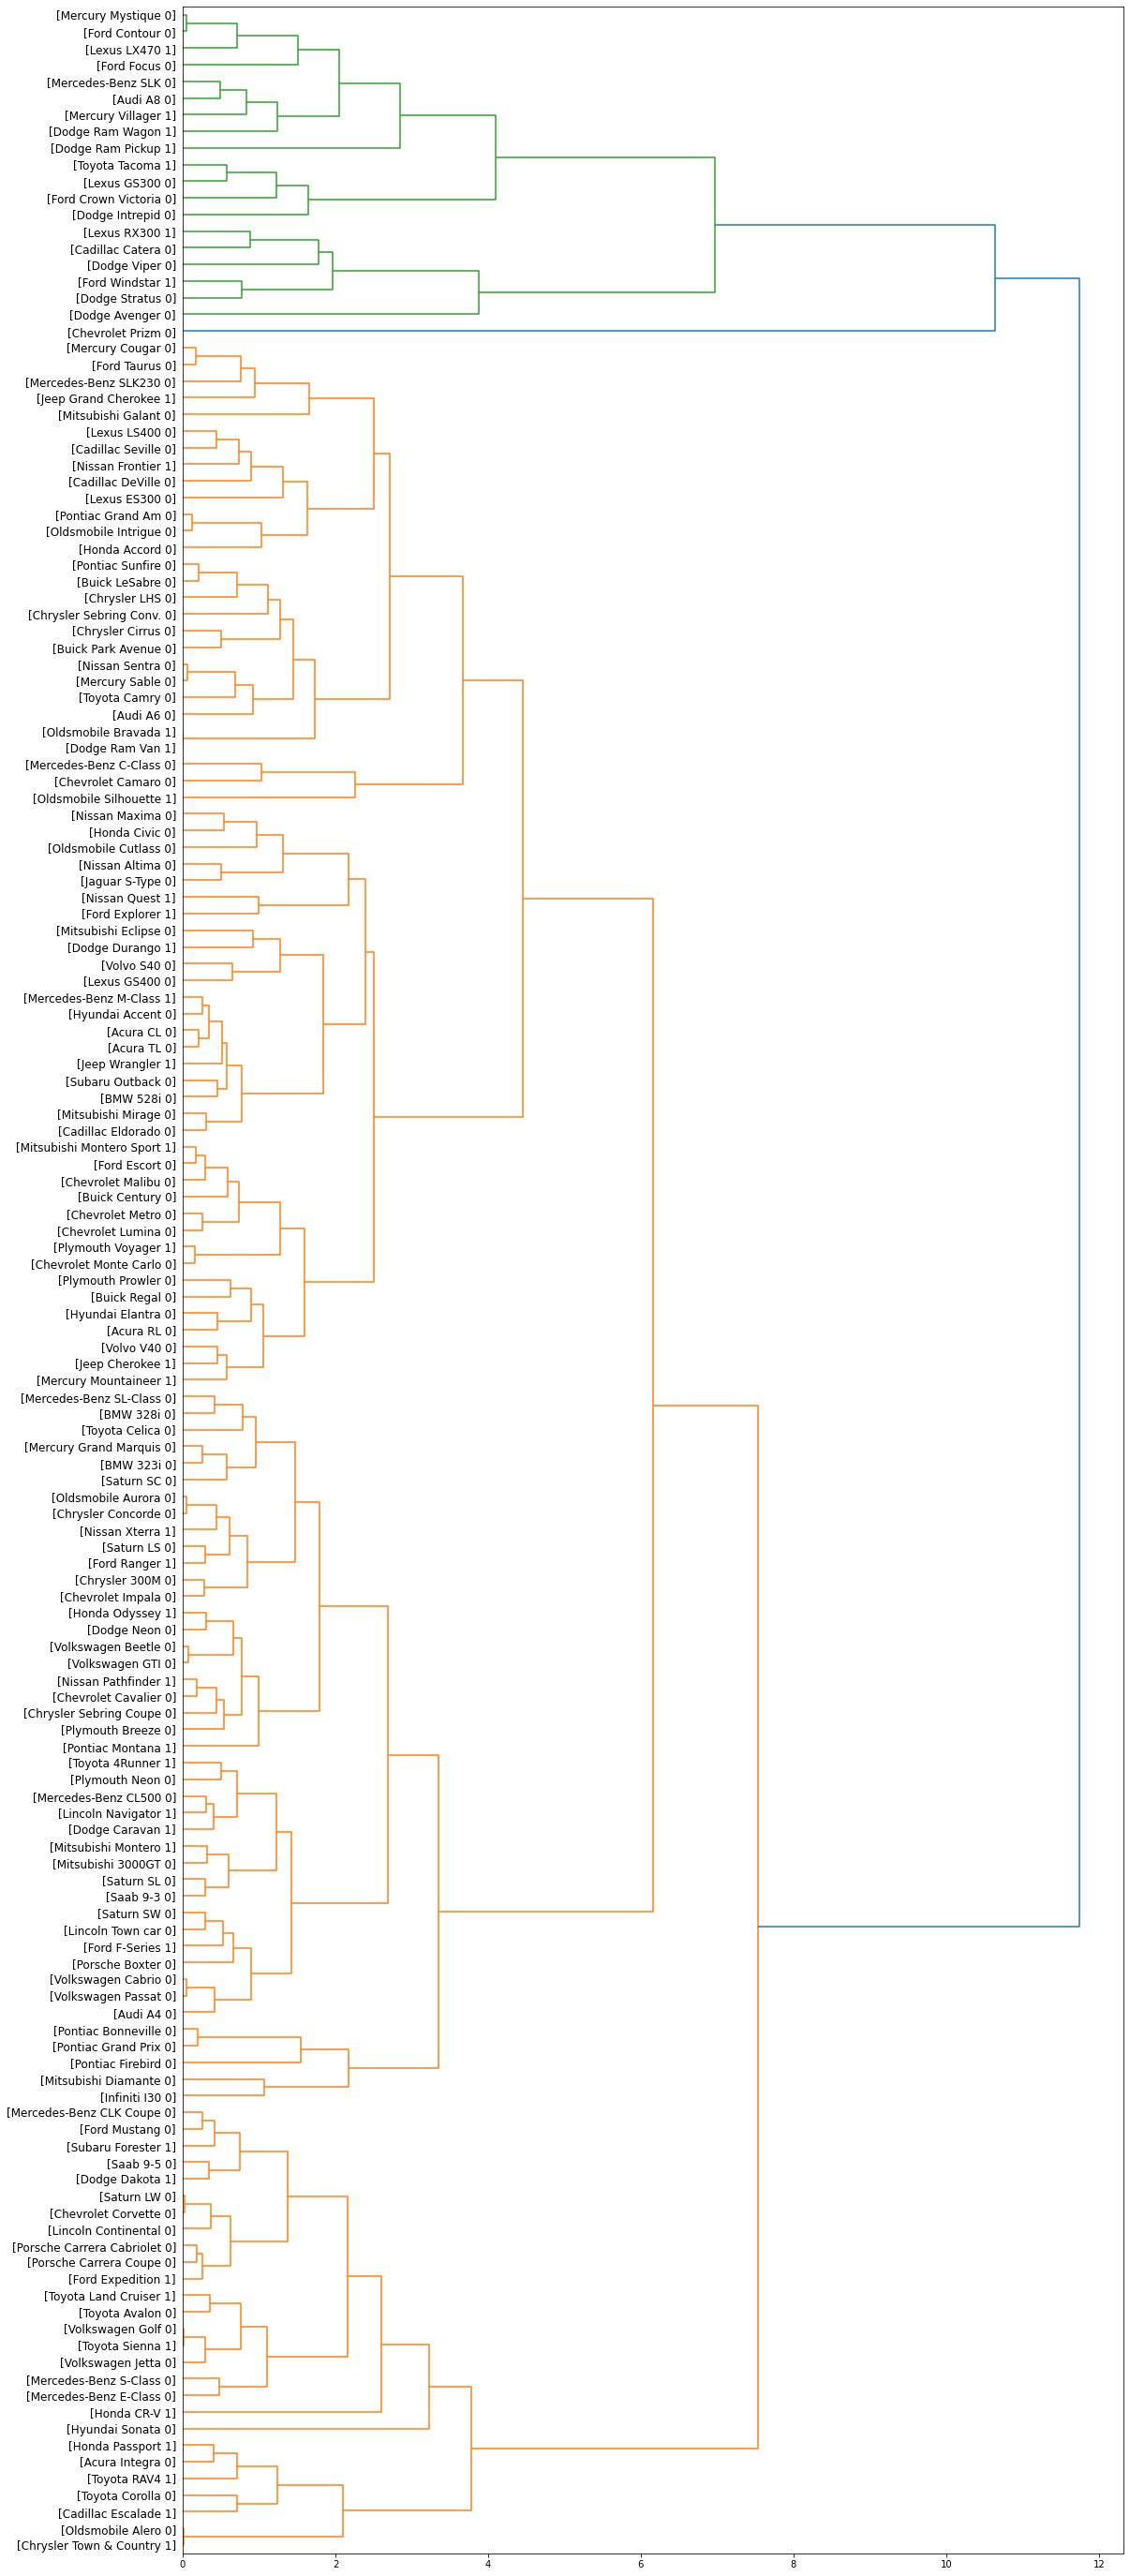

In [188]:
fig = plt.figure(figsize=(18,50))

print(df1["manufact"][33])
def llf(id):
    
    return '[%s %s %s]' % (df1['manufact'][id], df1['model'][id], int(float(df1['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<ipython-input-220-be3b7e5160f4>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(1,1,1)


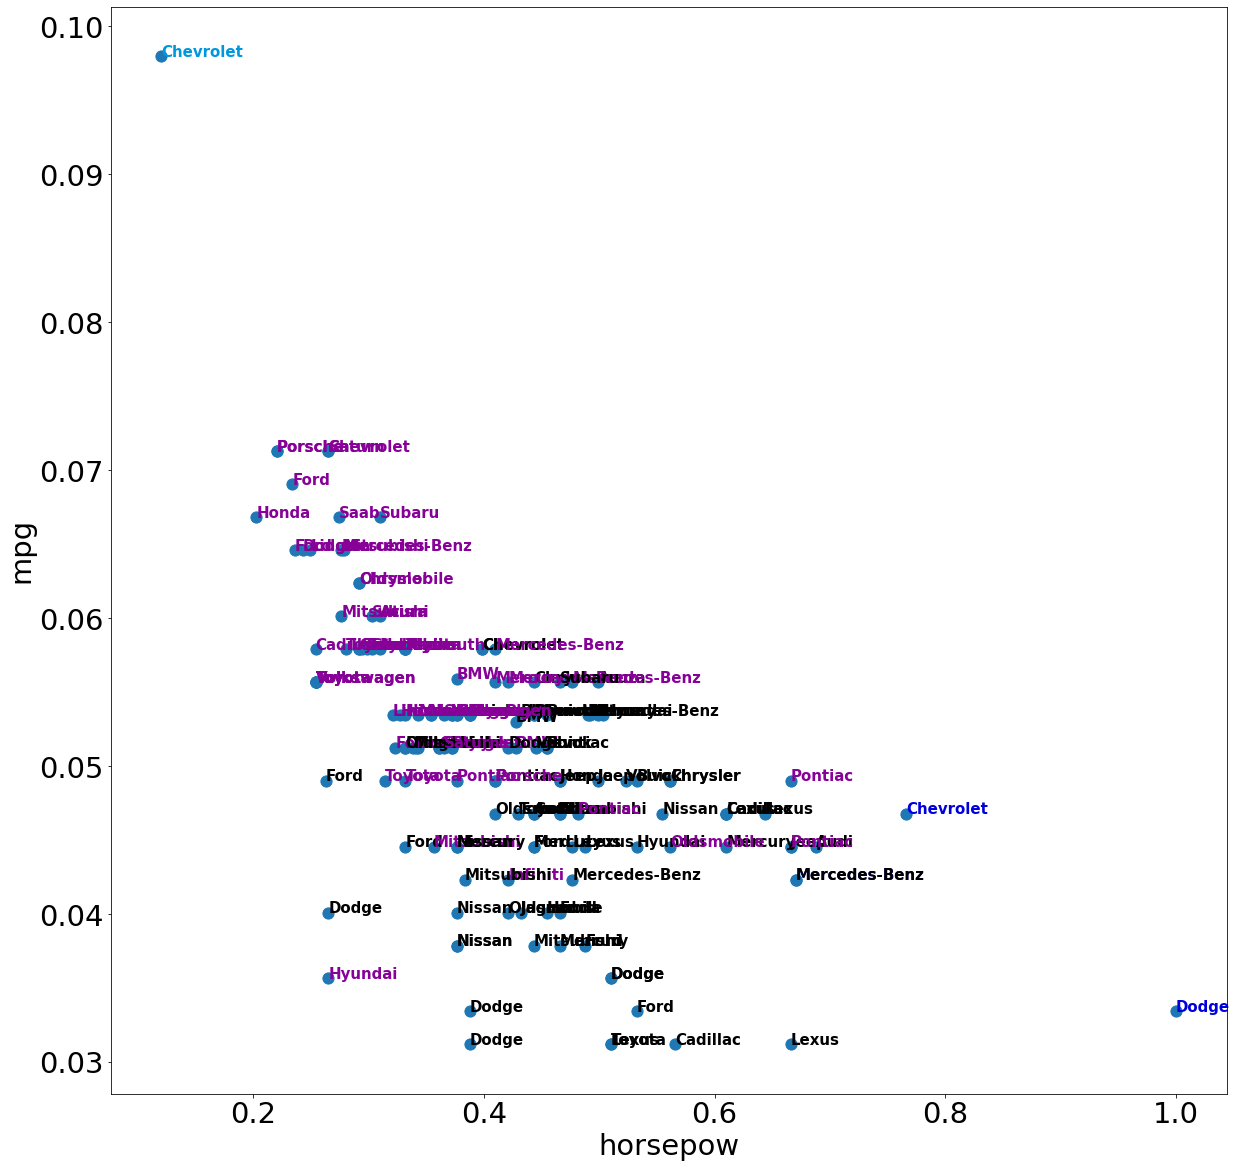

In [220]:
plt.figure(figsize=(20,20))
x1,x2=np.min(X),np.max(X)
ax=fig.add_subplot(1,1,1)
X=(X-x1)/(x2-x1)
for i in range(X.shape[0]):
    plt.text(X[i,1],X[i,7],str(df1["manufact"][i]),color=plt.cm.nipy_spectral(agglo.labels_[i]/10),fontdict={'weight': 'bold', 'size': 9},fontsize=15)
plt.scatter(X[:,1],X[:,7],marker='.',s=500)  
plt.xlabel("horsepow")
plt.ylabel("mpg")
plt.rcParams.update({'font.size': 29})
plt.show()
